In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('C:/Users/Dell/PycharmProjects/AQIndex/Data/Real-Data/real_comb.csv')
df.head()


,T,TM,Tm,H,W,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [5]:
df.isnull().sum()

T        0
TM       0
Tm       0
H        0
W        0
V        0
VM       0
PM2.5    1
dtype: int64

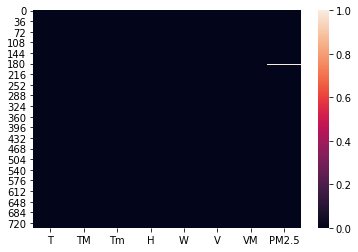

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dropna(inplace=True)

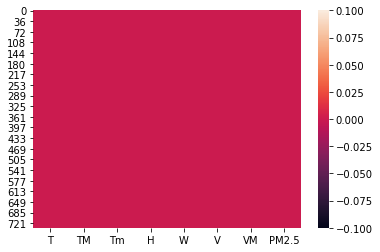

In [8]:
sns.heatmap(df.isnull())

In [9]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

### Apply Random Forest

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size= 0.3, random_state= 3)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
ran_reg= RandomForestRegressor()

In [18]:
ran_reg.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
ran_reg.score(x_train,y_train)

0.9110432530078725

In [20]:
ran_reg.score(x_test,y_test)

0.446035248028964

##### Model Evaluation

In [26]:
prediction= ran_reg.predict(x_test)

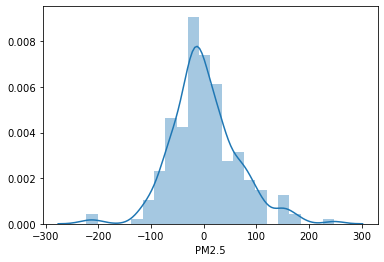

In [27]:
sns.distplot(y_test-prediction)

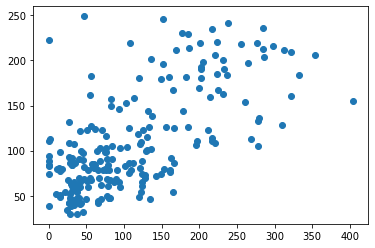

In [28]:
plt.scatter(y_test,prediction) 

In [30]:
 # Grapgh is litter better and somewhat more linear than the graph we saw in other models - Dtree, Linear, 

### Checking the R squared through Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
score=cross_val_score(ran_reg,x,y,cv=5)

In [24]:
score.mean()

0.24595994090556653

#### Cross Vaidation score is less than the train_test_split approach

### Now checking through the HypedrparameterTuning- Randomized search CV

In [31]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,

In [41]:
n_est= [int(x) for x in np.linspace(100,1500,12)]
n_est

[100, 227, 354, 481, 609, 736, 863, 990, 1118, 1245, 1372, 1500]

In [42]:
max= [int(x) for x in np.linspace(100,4000, 10)]

In [43]:
params= {'n_estimators': n_est, 'criterion': ["mse", "mae"], 'min_samples_split': [2,3,4,5], 'max_depth' : max,
        'min_weight_fraction_leaf': [0.1,0.3,0.5,0.,0.9], 'max_features' : ["auto", "sqrt", "log2"] ,  }

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
rf=RandomForestRegressor()

In [62]:
rf_random= RandomizedSearchCV(estimator=rf, param_distributions= params, scoring= 'neg_mean_squared_error',n_iter=100, cv=5, random_state=42,n_jobs=-1)

In [63]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [100, 533, 966, 1400, 1833,
                                                      2266, 2700, 3133, 3566,
                                                      4000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.1, 0.3,
                                                                     0.5, 0.0,
                                                                     0.9],
                                        'n_estimators': [100, 227, 354, 481,
                                                         609, 736, 863, 990,
        

In [64]:
rf_random.best_params_

{'n_estimators': 863,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 533,
 'criterion': 'mae'}

In [66]:
rf_random.best_score_ # we can see secore is more nearrer to 0 than other models we fitted earlier

-3778.9630702044124

In [67]:
rf2= RandomForestRegressor(n_estimators = 863,
 min_weight_fraction_leaf= 0.0,
 min_samples_split= 4,
 max_features= 'sqrt',
 max_depth= 533,
 criterion= 'mae')

In [68]:
rf2.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=533, max_features='sqrt',
                      min_samples_split=4, n_estimators=863)

In [69]:
rf2.score(x_train,y_train)

0.8652574116103688

In [70]:
rf2.score(x_test,y_test)

0.4762243332346058

### So far we got the best accuracy throuct Hyperparameter tuning of Random Forest Algorithm

In [71]:
prediction2= rf2.predict(x_test)

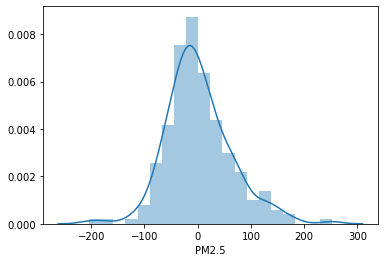

In [72]:
sns.distplot(y_test-prediction2)

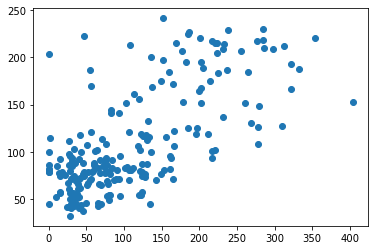

In [74]:
plt.scatter(y_test,prediction2) # Comparatively more linearity in the graph than the previous models

In [75]:
from sklearn import metrics

In [76]:
print('MAE', metrics.mean_absolute_error(y_test,prediction2))
print('MSE', metrics.mean_squared_error(y_test,prediction2))
print('MSE', np.sqrt(metrics.mean_squared_error(y_test,prediction2)))

MAE 46.25464872485228
MSE 3811.9480403290586
MSE 61.74097537558877


In [77]:
import pickle

file= open('RandomForestHPT.pkl', 'wb')
pickle.dump(rf2, file )